In [3]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from os import listdir
import os

In [4]:
df = pd.read_csv("data/data1/total_data.csv", index_col='index')

In [5]:
df

,user_id,original_image,face_id,age,gender
index,,,,,
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m
...,...,...,...,...,...
19341,101515718@N03,10587826073_6663f5b654_o.jpg,2280,"(25, 32)",f
19342,101515718@N03,10587571495_a61785cd06_o.jpg,2278,"(25, 32)",m
19343,101515718@N03,10587571495_a61785cd06_o.jpg,2279,"(25, 32)",f


(200, 200)


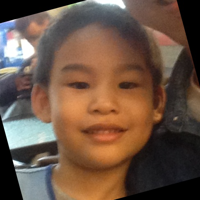

In [6]:
base_image_path = 'data/data1/faces/7153718@N04/coarse_tilt_aligned_face.2282.11597935265_29bcdfa4a5_o.jpg'
img = Image.open(base_image_path).convert("RGB").resize((200, 200))
print(img.size)
img

In [7]:
np.array(img).shape

(200, 200, 3)

In [8]:
files = [im for im in listdir("data/data1/faces")]
files[:5]

['100003415@N08',
 '10001312@N04',
 '100014826@N03',
 '10008401@N05',
 '100346410@N05']

In [12]:
df.iloc[0].user_id

'30601258@N03'

In [13]:
print(os.path.join('data/data1/faces/', '7153718@N04', 'coarse_tilt_aligned_face.2282.11597935265_29bcdfa4a5_o.jpg'  ))

data/data1/faces/7153718@N04/coarse_tilt_aligned_face.2282.11597935265_29bcdfa4a5_o.jpg


In [14]:
paths = []
img_array = []
main_path  = 'data/data1/faces/'
for row in range(len(df)):
    path = os.path.join(main_path, str(df.iloc[row].user_id), 'coarse_tilt_aligned_face.' + str(df.iloc[row].face_id) + '.' + str(df.iloc[row].original_image))
    paths.append(path)
    img = Image.open(path).resize((200, 200)) 
    img_array.append(np.array(img))

In [15]:
df['paths'] = paths
df['image_array'] = img_array

In [16]:
df

,user_id,original_image,face_id,age,gender,paths,image_array
index,,,,,,,
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,data/data1/faces/30601258@N03/coarse_tilt_alig...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,data/data1/faces/30601258@N03/coarse_tilt_alig...,"[[[240, 212, 198], [241, 213, 201], [239, 211,..."
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,data/data1/faces/30601258@N03/coarse_tilt_alig...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,data/data1/faces/30601258@N03/coarse_tilt_alig...,"[[[180, 158, 117], [177, 155, 114], [181, 159,..."
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,data/data1/faces/30601258@N03/coarse_tilt_alig...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...,...,...,...,...
19341,101515718@N03,10587826073_6663f5b654_o.jpg,2280,"(25, 32)",f,data/data1/faces/101515718@N03/coarse_tilt_ali...,"[[[177, 133, 94], [186, 143, 105], [157, 111, ..."
19342,101515718@N03,10587571495_a61785cd06_o.jpg,2278,"(25, 32)",m,data/data1/faces/101515718@N03/coarse_tilt_ali...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
19343,101515718@N03,10587571495_a61785cd06_o.jpg,2279,"(25, 32)",f,data/data1/faces/101515718@N03/coarse_tilt_ali...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [17]:
df['image_array'] = df['image_array'] / 255

In [18]:
df.to_csv('data/data1/total_data_paths.csv')

In [19]:
df.iloc[10].paths

'data/data1/faces/30601258@N03/coarse_tilt_aligned_face.2.11624488765_9db0b93c94_o.jpg'

In [20]:
df['paths'][10]

'data/data1/faces/30601258@N03/coarse_tilt_aligned_face.2.11624488765_9db0b93c94_o.jpg'

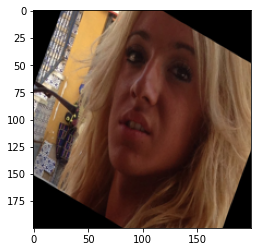

In [21]:
plt.imshow(df['image_array'][0])

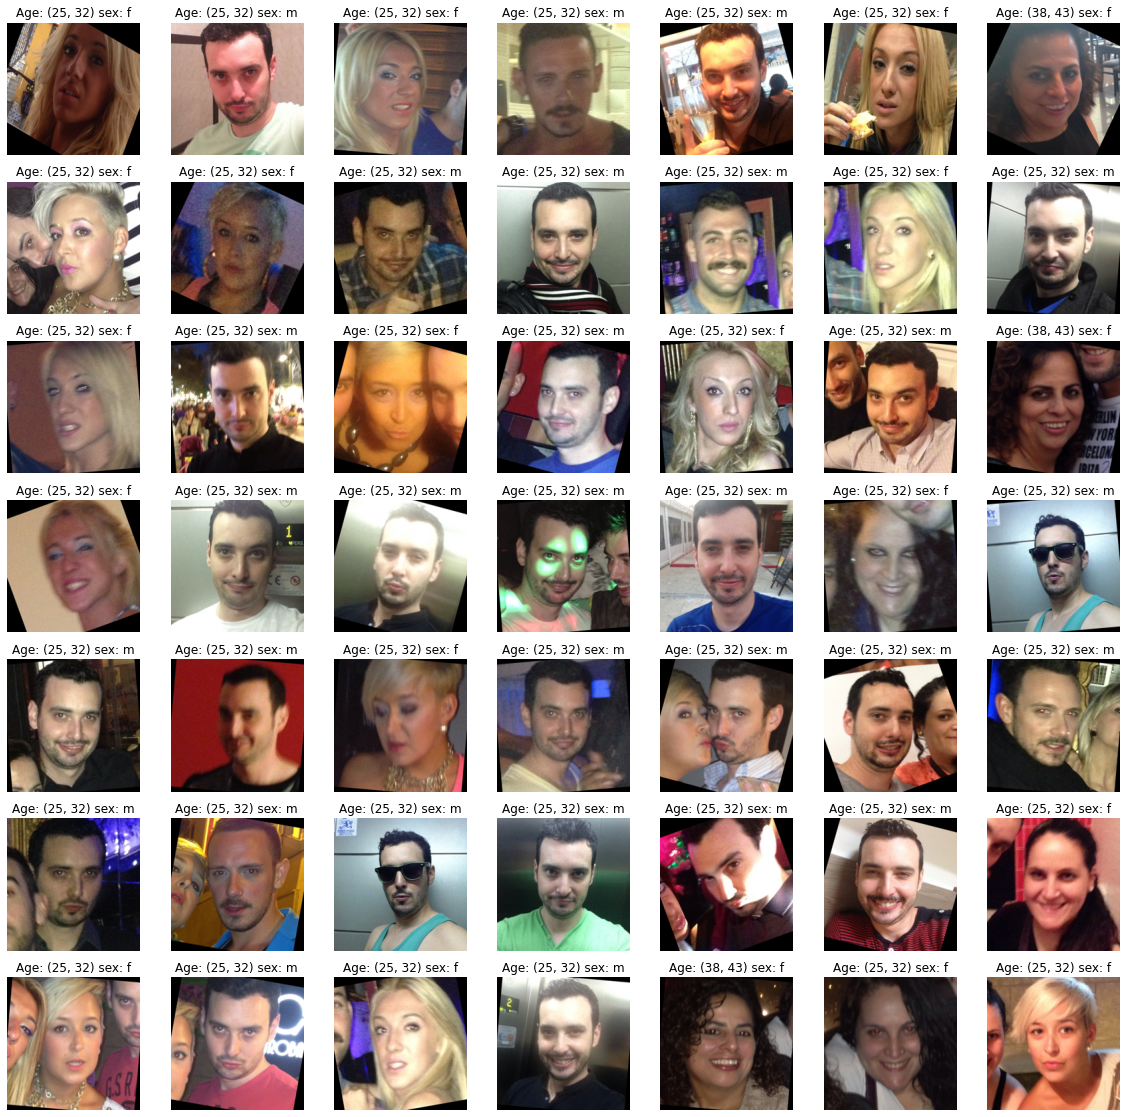

In [22]:
plt.figure(figsize=(20,20))
for row in range(49):
    plt.subplot(7,7,row+1)
    plt.axis('off')
    plt.title('Age: ' + df['age'][row] + ' sex: ' + df['gender'][row] )
    plt.imshow(df['image_array'][row])
    

In [23]:
print(df['age'][0])
print(type(df['age'][0]))

(25, 32)
<class 'str'>


In [24]:
df[df['age'] == '(0, 2)']

,user_id,original_image,face_id,age,gender,paths,image_array
index,,,,,,,
1298,37303189@N08,9793124654_25eecaf6d2_o.jpg,84,"(0, 2)",m,data/data1/faces/37303189@N08/coarse_tilt_alig...,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
1300,37303189@N08,11310108816_289f10b80b_o.jpg,84,"(0, 2)",m,data/data1/faces/37303189@N08/coarse_tilt_alig...,"[[[0.13725490196078433, 0.09803921568627451, 0..."
1301,37303189@N08,10295157835_b4e6bd95c4_o.jpg,84,"(0, 2)",m,data/data1/faces/37303189@N08/coarse_tilt_alig...,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
1304,37303189@N08,10601083796_f8432ae909_o.jpg,84,"(0, 2)",m,data/data1/faces/37303189@N08/coarse_tilt_alig...,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
1305,37303189@N08,9305191408_6a7b261115_o.jpg,84,"(0, 2)",m,data/data1/faces/37303189@N08/coarse_tilt_alig...,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
...,...,...,...,...,...,...,...
19297,20696814@N02,8493569411_84d529331e_o.jpg,2256,"(0, 2)",u,data/data1/faces/20696814@N02/coarse_tilt_alig...,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
19298,20696814@N02,10435250205_8e9e057499_o.jpg,2256,"(0, 2)",u,data/data1/faces/20696814@N02/coarse_tilt_alig...,"[[[0.00392156862745098, 0.0, 0.0], [0.00392156..."
19301,20696814@N02,11511754875_883737a136_o.jpg,2256,"(0, 2)",u,data/data1/faces/20696814@N02/coarse_tilt_alig...,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."


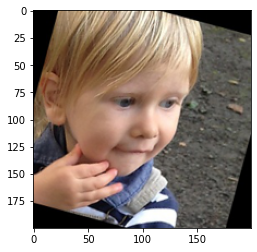

In [25]:
plt.imshow(df['image_array'][19306])

In [26]:
df[df['age'] == '23']

,user_id,original_image,face_id,age,gender,paths,image_array
index,,,,,,,
4523,114841417@N06,12101763726_1d11b44823_o.jpg,494,23,f,data/data1/faces/114841417@N06/coarse_tilt_ali...,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
4549,114841417@N06,12076971923_c1faf4bb8f_o.jpg,494,23,f,data/data1/faces/114841417@N06/coarse_tilt_ali...,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
4576,114841417@N06,12059747423_6b3535aa6a_o.jpg,494,23,f,data/data1/faces/114841417@N06/coarse_tilt_ali...,"[[[0.2627450980392157, 0.23529411764705882, 0...."
4923,114841417@N06,12101091395_c81a5cecb3_o.jpg,494,23,f,data/data1/faces/114841417@N06/coarse_tilt_ali...,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
4943,114841417@N06,12101084525_af178e1d3e_o.jpg,494,23,f,data/data1/faces/114841417@N06/coarse_tilt_ali...,"[[[0.00784313725490196, 0.0, 0.003921568627450..."
...,...,...,...,...,...,...,...
14186,113846810@N03,11843951866_e9a60f8b25_o.jpg,1481,23,f,data/data1/faces/113846810@N03/coarse_tilt_ali...,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
14190,113846810@N03,11843146995_2e7ea0a838_o.jpg,1481,23,f,data/data1/faces/113846810@N03/coarse_tilt_ali...,"[[[0.3843137254901961, 0.3607843137254902, 0.3..."
14197,113846810@N03,11840716113_1ba0c578da_o.jpg,1499,23,f,data/data1/faces/113846810@N03/coarse_tilt_ali...,"[[[0.28627450980392155, 0.1803921568627451, 0...."


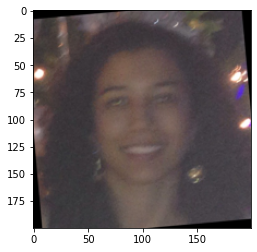

In [27]:
plt.imshow(df['image_array'][4523])

In [28]:
df.to_csv('data/data1/total_data_paths.csv')

In [29]:
type(df.image_array[0])

numpy.ndarray

In [30]:
df.image_array[0].shape

(200, 200, 3)